In [113]:
pip install yfinance

In [114]:
pip install nsepy

In [115]:
pip install pmdarima

In [116]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [118]:
import yfinance as yf
stock = yf.Ticker('AMZN')
sbin = stock.history(period='1mo')
sbin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-19,3390.330078,3435.929932,3360.159912,3372.010010,2725400,0,0
2021-04-20,3373.600098,3382.989990,3316.000000,3334.689941,2623000,0,0
2021-04-21,3316.000000,3362.860107,3303.810059,3362.020020,2211200,0,0
2021-04-22,3371.679932,3372.870117,3301.449951,3309.040039,2580600,0,0
2021-04-23,3319.100098,3375.000000,3308.500000,3340.879883,3192800,0,0


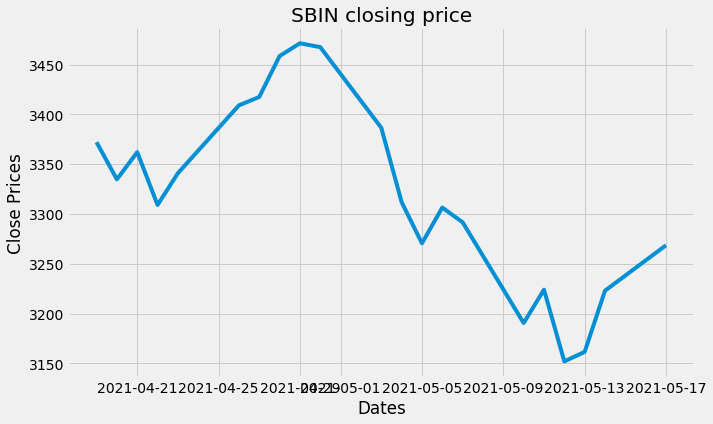

In [119]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Close'])
plt.title('AMZN closing price')
plt.show()

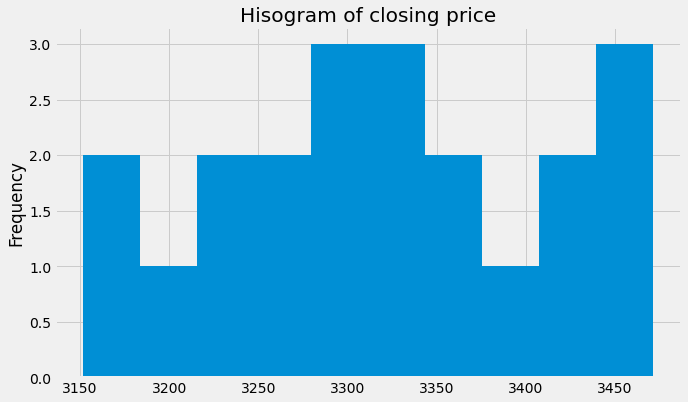

In [120]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

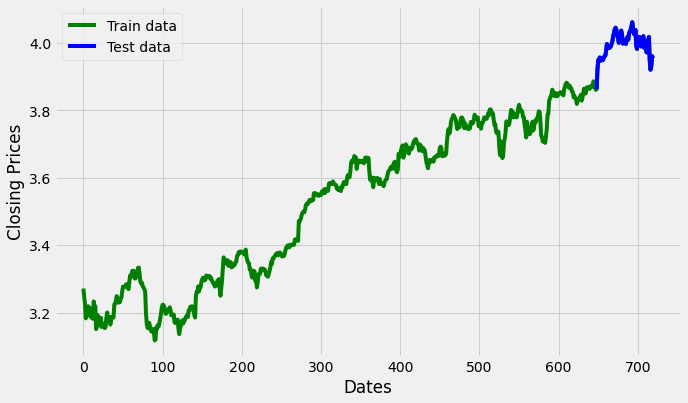

In [121]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [122]:
model_autoARIMA = auto_arima(train_data)
print(model_autoARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  645
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1872.309
Date:                Mon, 17 May 2021   AIC                          -3738.619
Time:                        14:06:18   BIC                          -3725.216
Sample:                             0   HQIC                         -3733.418
                                - 645                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.001      1.907      0.057   -2.94e-05       0.002
ma.L1          0.0547      0.033      1.662      0.096      -0.010       0.119
sigma2         0.0002   5.55e-06     31.471      0.0

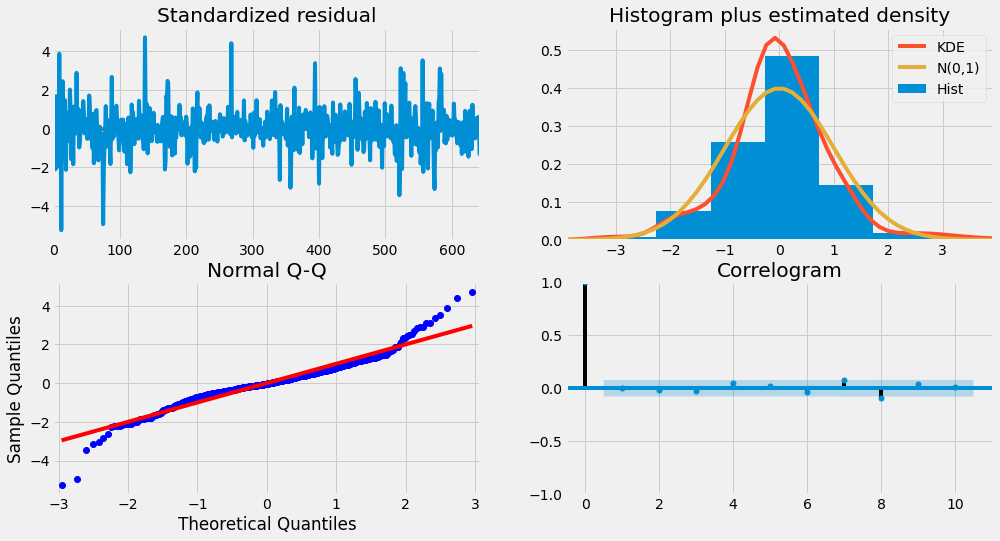

In [123]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [124]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  644
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1876.738
Method:                       css-mle   S.D. of innovations              0.013
Date:                Mon, 17 May 2021   AIC                          -3739.476
Time:                        14:06:26   BIC                          -3708.202
Sample:                             1   HQIC                         -3727.340
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.001      1.864      0.062   -5.39e-05       0.002
ar.L1.D.Close    -1.5457      0.056    -27.697      0.000      -1.655      -1.436
ar.L2.D.Close    -0.7978      0.082     

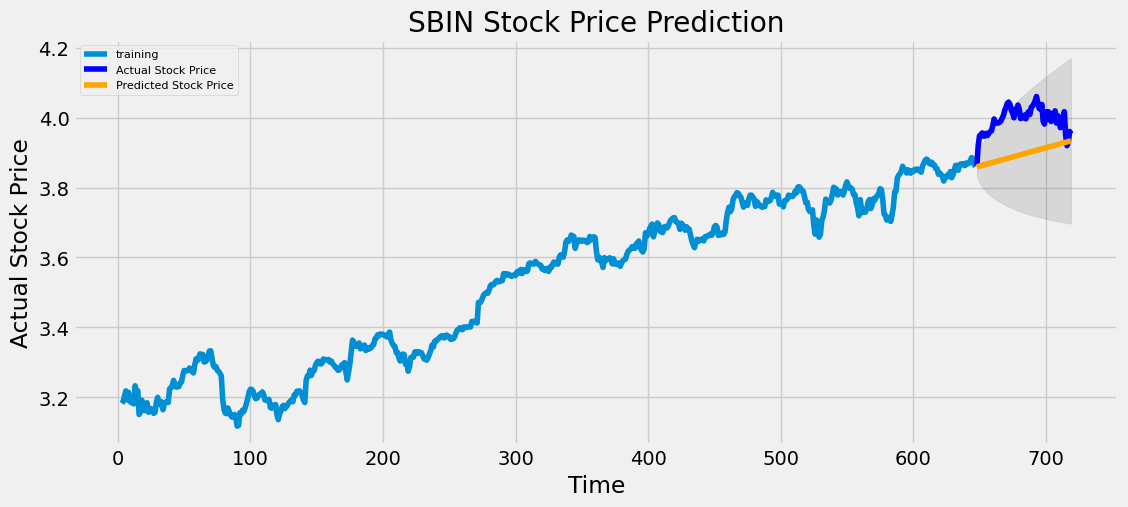

In [126]:
fc, se, conf = fitted.forecast(72, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
color='k', alpha=.10)
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()